# Optimización escalar con SymPy: criterio conocido

Para la siguientes funciones encuentre los puntos críticos, grafique y diga si éste se trata de un máximo o mínimo, local o global.

In [2]:
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

1. $f(x)=x+\frac{1}{x^2}$

In [3]:
x=sym.var('x')
f=x+1/(x**2)
f

x + x**(-2)

In [5]:
df=f.diff()
df

1 - 2/x**3

In [7]:
c=sym.solve(df,x)
c

[2**(1/3),
 -2**(1/3)/2 - 2**(1/3)*sqrt(3)*I/2,
 -2**(1/3)/2 + 2**(1/3)*sqrt(3)*I/2]

In [63]:
reales = [sol.evalf() for sol in c if sol.is_real]
reales

[-0.785398163397448, 0.785398163397448]

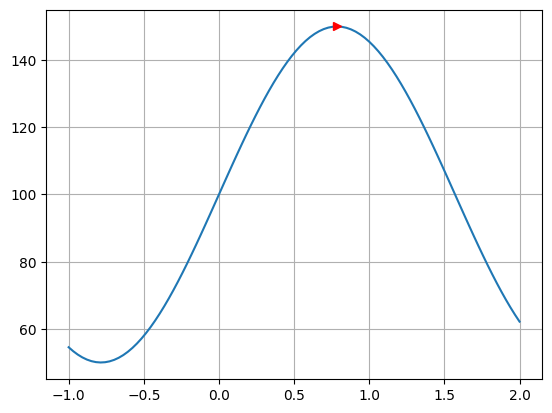

In [65]:
x_num=np.linspace(-1,2,100)
y_num=[f.subs(x,val) for val in x_num]
plt.plot(x_num,y_num)
plt.plot(point,f.subs(x,point),'r>')
plt.grid()
plt.show()

2. $f(x)=1260+117x-9x^2$

In [171]:
x=sym.var('x')
f=1260+117*x-9*x**2
f

-9*x**2 + 117*x + 1260

In [172]:
df=f.diff()
df

117 - 18*x

In [181]:
c=sym.solve(df,x)
c

[13/2]

In [177]:
critical_points = [p for p in c if p ==0]
critical_points

[]

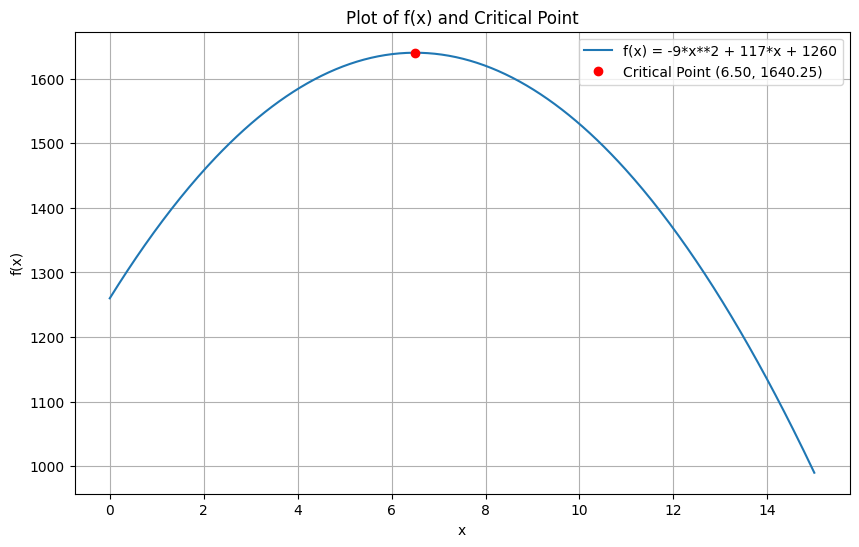

In [182]:
x_vals = np.linspace(0, 15, 400)
f_vals = [f.subs(x, val) for val in x_vals]
plt.figure(figsize=(10, 6))
plt.plot(x_vals, f_vals, label=f'f(x) = {f}')
critical_point = c[0]
plt.plot(critical_point, f.subs(x, critical_point), 'ro', label=f'Critical Point ({critical_point:.2f}, {f.subs(x, critical_point):.2f})')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Plot of f(x) and Critical Point')
plt.grid(True)
plt.legend()
plt.show()

3. $f(x)=5+x+\frac{4}{x}$, para $x>0$

In [186]:
x=sym.var('x')
f=5+x+4/x
f

x + 5 + 4/x

In [187]:
df=f.diff()
df

1 - 4/x**2

In [196]:
c=sym.solve(df,x)
c

[-2, 2]

In [199]:
ccritical_points = sym.solve(df, x)
real_critical_points = [float(pt) for pt in critical_points if pt > 0]

<lambdifygenerated-31>:2: RuntimeWarning: divide by zero encountered in divide
  return x + 5 + 4/x


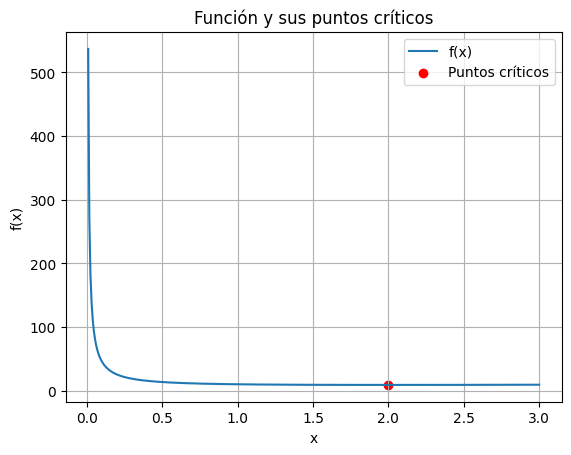

In [201]:
f_np = sym.lambdify(x, f, 'numpy')
x_vals = np.linspace(0, 3, 400)
y_vals = f_np(x_vals)
plt.plot(x_vals, y_vals, label='f(x)')
plt.scatter(real_critical_points, [f.subs(x, p) for p in real_critical_points], color='red', label='Puntos críticos')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función y sus puntos críticos')
plt.legend()
plt.grid(True)
plt.show()

4. $f(x)=\frac{15x}{2}\sqrt{\frac{x}{x-30}}$

In [202]:
x=sym.var('x')
f=15*x/2*sym.sqrt(x/(x-30))
f

15*x*sqrt(x/(x - 30))/2

In [203]:
df=f.diff()
df

15*sqrt(x/(x - 30))*(x - 30)*(-x/(2*(x - 30)**2) + 1/(2*(x - 30)))/2 + 15*sqrt(x/(x - 30))/2

In [207]:
c=sym.solve(df,x)
c

[0, 45]

In [209]:
ritical_points = sym.solve(df, x)
real_critical_points = [float(pt) for pt in critical_points if pt.is_real and (pt < 0 or pt > 30)]

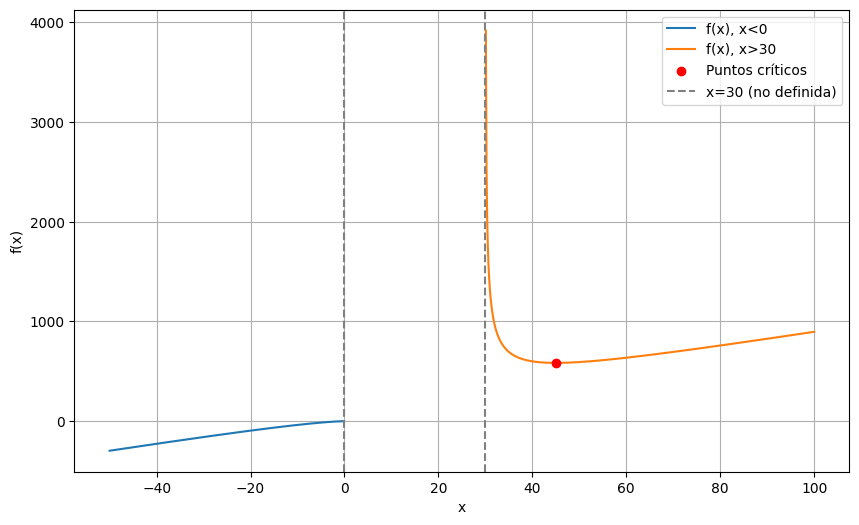

In [212]:
f_lambdified = sym.lambdify(x, f, modules=["numpy"])
x1 = np.linspace(-50, -0.1, 500)  # x<0
x2 = np.linspace(30.1, 100, 500)  # x>30
y1 = f_lambdified(x1)
y2 = f_lambdified(x2)
plt.figure(figsize=(10,6))
plt.plot(x1, y1, label='f(x), x<0')
plt.plot(x2, y2, label='f(x), x>30')
plt.scatter(real_critical_points, [f_lambdified(pt) for pt in real_critical_points], color='red', zorder=5, label='Puntos críticos')
plt.axvline(0, color='gray', linestyle='--')
plt.axvline(30, color='gray', linestyle='--', label='x=30 (no definida)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

5. $f(x)=6-2x+\sqrt{18-2x^2}$, para $-3\leq x\leq 3$

In [218]:
x=sym.var('x')
f=6-2*x+sym.sqrt(18-2*x**2)
f

-2*x + sqrt(18 - 2*x**2) + 6

In [219]:
df=f.diff()
df

-2*x/sqrt(18 - 2*x**2) - 2

In [220]:
c=sym.solve(df,x)
c

[-sqrt(6)]

In [227]:
critical_points = sym.solve(df, x)
real_critical_points = [float(pt) for pt in critical_points if -3 <= pt <= 3]
real_critical_points

[-2.449489742783178]

<lambdifygenerated-37>:2: RuntimeWarning: invalid value encountered in sqrt
  return -2*x + sqrt(18 - 2*x**2) + 6


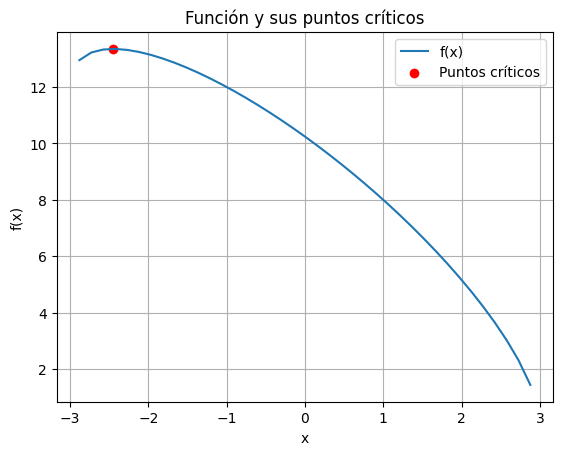

In [228]:
f_np = sym.lambdify(x, f, 'numpy')
x_vals = np.linspace(-5, 10, 100)
y_vals = f_np(x_vals)
plt.plot(x_vals, y_vals, label='f(x)')
plt.scatter(real_critical_points, [f.subs(x, p) for p in real_critical_points], color='red', label='Puntos críticos')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función y sus puntos críticos')
plt.legend()
plt.grid(True)
plt.show()

6. $f(x)=\frac{1}{4}x^4+\frac{1}{3}x^3-x^2$ en el intervalo $[-3,1.7]$

In [229]:
x=sym.var('x')
f=x**4/4+x**3/3-x**2
f

x**4/4 + x**3/3 - x**2

In [230]:
df=f.diff()
df

x**3 + x**2 - 2*x

In [231]:
c=sym.solve(df,x)
c

[-2, 0, 1]

In [232]:
critical_points_for_this_function = [-2, 0, 1]
real_critical_points = [p for p in critical_points_for_this_function if -3 <= p <= 1.7]
real_critical_points

[-2, 0, 1]

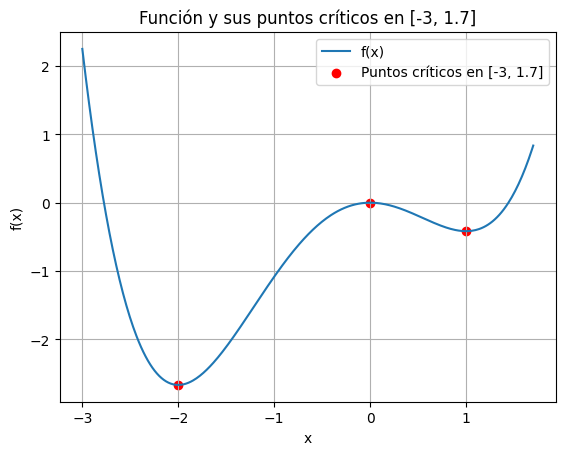

In [233]:
f_np = sym.lambdify(x, f, 'numpy')
x_vals = np.linspace(-3, 1.7, 400)
y_vals = f_np(x_vals)
plt.plot(x_vals, y_vals, label='f(x)')
plt.scatter(real_critical_points, [f.subs(x, p) for p in real_critical_points], color='red', label='Puntos críticos en [-3, 1.7]')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función y sus puntos críticos en [-3, 1.7]')
plt.legend()
plt.grid(True)
plt.show()

7. $f(x)=100(1+\cos(x)\sin(x))$, para $x\in[0.\frac{\pi}{2}]$

In [243]:
x=sym.var('x')
f=100*(1+sym.cos(x)*sym.sin(x))
f

100*sin(x)*cos(x) + 100

In [244]:
df=f.diff()
df

-100*sin(x)**2 + 100*cos(x)**2

In [245]:
c=sym.solve(df,x)
c

[-pi/4, pi/4]

In [248]:
critical_points = sym.solve(df, x)
real_critical_points = [float(pt) for pt in critical_points if 0 <= pt <=sym.pi/2]
real_critical_points

[0.7853981633974483]

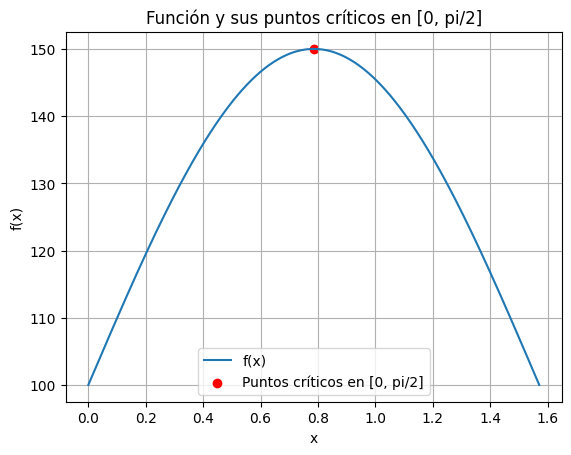

In [250]:
x_vals = np.linspace(0, sym.pi/2, 400)
y_vals = [f.subs(x, val) for val in x_vals]
y_vals_np = np.array(y_vals, dtype=float)
plt.plot(x_vals, y_vals_np, label='f(x)')
critical_points_values = [float(p.evalf()) if hasattr(p, 'evalf') else float(p) for p in real_critical_points]
function_values_at_critical_points = [float(f.subs(x, float(p))) if hasattr(p, 'evalf') else float(f.subs(x, p)) for p in real_critical_points]
plt.scatter(critical_points_values, function_values_at_critical_points, color='red', label='Puntos críticos en [0, pi/2]')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Función y sus puntos críticos en [0, pi/2]')
plt.legend()
plt.grid(True)
plt.show()

Hice uso de la Ia para gráfica de manera correcta más que nada en la 4 y 7 con la ayuda de gemini, y a veces para checar los puntos críticod ya que no me estaba dando